In [1]:
import pandas as pd
import numpy as np
import warnings
warnings.filterwarnings("ignore")

## Sommaire: <a class="anchor" id="sommaire"></a>
* [Sommaire](#sommaire)
* [I. Chargement et formatage des résultats](#result)
* [III. Visualisation](#dataViz)

## Chargement et formatage des résultats <a class="anchor" id="result"></a>

In [2]:
result_nblayer = pd.read_csv('results/df_metric_nbcouches.csv')
result_nblayer

,Unnamed: 0,identity,separability,stability,coherence,completness,congruence,selectivity,accumen
0,l2x_1c,1.0,1.0,0.9,0.130186,0.873562,0.126056,0.812905,0.034560
1,lime_1c,1.0,1.0,1.0,0.193390,0.806607,0.230697,0.737749,0.165890
2,shap_1c,1.0,1.0,1.0,0.193058,0.806935,0.230956,0.820907,0.518303
3,saliency_1c,1.0,1.0,0.9,0.230164,0.680337,0.198902,0.589852,NaN
4,l2x_2c,1.0,1.0,1.0,0.126181,0.875158,0.132891,0.753739,0.038807
5,lime_2c,1.0,1.0,1.0,0.189980,0.809985,0.222329,0.819905,0.067064
6,shap_2c,1.0,1.0,0.8,0.189977,0.809987,0.222328,0.985518,0.899809
7,saliency_2c,1.0,1.0,1.0,0.281180,0.610101,0.185767,0.468041,NaN
8,l2x_3c,1.0,1.0,1.0,0.138693,0.864190,0.145058,0.760458,0.044821
9,lime_3c,1.0,1.0,1.0,0.215997,0.783982,0.243860,0.755350,0.073842


In [3]:
result_nblayer.columns = ['explainer', 'identity', 'separability', 'stability', 'coherence',
       'completness', 'congruence', 'selectivity', 'accumen']

In [4]:
model = ["1_layer" for i in range(1,5)] + ["2_layers" for i in range(1,5)] + ["3_layers" for i in range(1,5)] + ["feat_select" for i in range(1,5)]
len(model[0])
result_nblayer['model'] = model[0]
result_nblayer

,explainer,identity,separability,stability,coherence,completness,congruence,selectivity,accumen,model
0,l2x_1c,1.0,1.0,0.9,0.130186,0.873562,0.126056,0.812905,0.034560,1_layer
1,lime_1c,1.0,1.0,1.0,0.193390,0.806607,0.230697,0.737749,0.165890,1_layer
2,shap_1c,1.0,1.0,1.0,0.193058,0.806935,0.230956,0.820907,0.518303,1_layer
3,saliency_1c,1.0,1.0,0.9,0.230164,0.680337,0.198902,0.589852,NaN,1_layer
4,l2x_2c,1.0,1.0,1.0,0.126181,0.875158,0.132891,0.753739,0.038807,1_layer
5,lime_2c,1.0,1.0,1.0,0.189980,0.809985,0.222329,0.819905,0.067064,1_layer
6,shap_2c,1.0,1.0,0.8,0.189977,0.809987,0.222328,0.985518,0.899809,1_layer
7,saliency_2c,1.0,1.0,1.0,0.281180,0.610101,0.185767,0.468041,NaN,1_layer
8,l2x_3c,1.0,1.0,1.0,0.138693,0.864190,0.145058,0.760458,0.044821,1_layer
9,lime_3c,1.0,1.0,1.0,0.215997,0.783982,0.243860,0.755350,0.073842,1_layer


In [5]:
tmp = []
explainers = [["l2x", "lime", "shap", "saliency"] for i in range(4)]
explainer = [tmp + exp for exp in explainers]

for xx in explainers : 
    tmp.extend(xx)

result_nblayer['explainers'] = tmp
result_nblayer

,explainer,identity,separability,stability,coherence,completness,congruence,selectivity,accumen,model,explainers
0,l2x_1c,1.0,1.0,0.9,0.130186,0.873562,0.126056,0.812905,0.034560,1_layer,l2x
1,lime_1c,1.0,1.0,1.0,0.193390,0.806607,0.230697,0.737749,0.165890,1_layer,lime
2,shap_1c,1.0,1.0,1.0,0.193058,0.806935,0.230956,0.820907,0.518303,1_layer,shap
3,saliency_1c,1.0,1.0,0.9,0.230164,0.680337,0.198902,0.589852,NaN,1_layer,saliency
4,l2x_2c,1.0,1.0,1.0,0.126181,0.875158,0.132891,0.753739,0.038807,1_layer,l2x
5,lime_2c,1.0,1.0,1.0,0.189980,0.809985,0.222329,0.819905,0.067064,1_layer,lime
6,shap_2c,1.0,1.0,0.8,0.189977,0.809987,0.222328,0.985518,0.899809,1_layer,shap
7,saliency_2c,1.0,1.0,1.0,0.281180,0.610101,0.185767,0.468041,NaN,1_layer,saliency
8,l2x_3c,1.0,1.0,1.0,0.138693,0.864190,0.145058,0.760458,0.044821,1_layer,l2x
9,lime_3c,1.0,1.0,1.0,0.215997,0.783982,0.243860,0.755350,0.073842,1_layer,lime


In [6]:
result_cleaned = result_nblayer.query('explainers!="saliency" & model!="feat_select"')
result_cleaned

,explainer,identity,separability,stability,coherence,completness,congruence,selectivity,accumen,model,explainers
0,l2x_1c,1.0,1.0,0.9,0.130186,0.873562,0.126056,0.812905,0.034560,1_layer,l2x
1,lime_1c,1.0,1.0,1.0,0.193390,0.806607,0.230697,0.737749,0.165890,1_layer,lime
2,shap_1c,1.0,1.0,1.0,0.193058,0.806935,0.230956,0.820907,0.518303,1_layer,shap
4,l2x_2c,1.0,1.0,1.0,0.126181,0.875158,0.132891,0.753739,0.038807,1_layer,l2x
5,lime_2c,1.0,1.0,1.0,0.189980,0.809985,0.222329,0.819905,0.067064,1_layer,lime
6,shap_2c,1.0,1.0,0.8,0.189977,0.809987,0.222328,0.985518,0.899809,1_layer,shap
8,l2x_3c,1.0,1.0,1.0,0.138693,0.864190,0.145058,0.760458,0.044821,1_layer,l2x
9,lime_3c,1.0,1.0,1.0,0.215997,0.783982,0.243860,0.755350,0.073842,1_layer,lime
10,shap_3c,1.0,1.0,0.9,0.216050,0.783944,0.243878,0.950698,0.314177,1_layer,shap
12,l2x_clv,1.0,1.0,1.0,0.164399,0.992444,0.196256,0.530065,0.053684,1_layer,l2x


In [7]:
name_model = ["1c", "2c", "3c", "4c"]
models = []
for f in name_model:
    for i in range(15):
        models.append(f)
len(models)

result_nblayer = pd.read_csv('sfds_result/df_metrics5_sfds.csv')
result_nblayer["models"] = models

mapping = {'lime_1c' : "lime", 'shap_1c' : "shap", 'l2x_1c' : "l2x",
           'lime_4c' : "lime", 'shap_4c' : "shap", 'l2x_4c' : "l2x"}
mapping
result_nblayer["explainer_recode"] = result_nblayer["explainer"].map(mapping)
result_nblayer.columns = ['idx', 'identity', 'separability', 'stability', 'coherence',
       'completness', 'congruence', 'selectivity', 'accumen', 'explainer',
       'models', 'explainer_rec']
result_nblayer["completeness"] = np.where(result_nblayer["completness"] >= 1, 1/result_nblayer["completness"], result_nblayer["completness"])
result_nblayer

,idx,identity,separability,stability,coherence,completness,congruence,selectivity,accumen,explainer,models,explainer_rec,completeness
0,0,1.0,1.0,1.0,0.250002,123.782043,0.306072,0.614124,0.042397,lime_1c,1c,lime,0.008079
1,0,1.0,1.0,1.0,0.147780,0.473728,0.183380,0.568432,0.313524,shap_1c,1c,shap,0.473728
2,0,1.0,1.0,0.9,0.181704,2.019102,0.222921,0.620089,0.035886,l2x_1c,1c,l2x,0.495270
3,0,1.0,1.0,1.0,0.161335,573.330444,0.185664,0.555408,0.119141,lime_1c,1c,lime,0.001744
4,0,1.0,1.0,1.0,0.157563,0.426702,0.181761,0.593014,0.472039,shap_1c,1c,shap,0.426702
5,0,1.0,1.0,1.0,0.155116,0.608091,0.179124,0.544497,0.052487,l2x_1c,1c,l2x,0.608091
6,0,1.0,1.0,1.0,0.144818,32.490021,0.245558,0.630698,0.044520,lime_1c,1c,lime,0.030779
7,0,1.0,1.0,0.9,0.141376,0.547619,0.243418,0.660767,0.583059,shap_1c,1c,shap,0.547619
8,0,1.0,1.0,1.0,0.174406,0.205540,0.271803,0.669541,0.035313,l2x_1c,1c,l2x,0.205540
9,0,1.0,1.0,1.0,0.227306,0.198970,0.251178,0.568998,0.113453,lime_1c,1c,lime,0.198970


In [8]:
df_perf = pd.read_csv('sfds_result/df_perf.csv')
df_perf.columns = ["models", "RMSE", "S-score"]
df_perf

,models,RMSE,S-score
0,1_layer,13.58,832.80
1,2_layers,9.88,445.61
2,3_layers,10.56,479.67
3,4_layers,10.22,515.54


In [9]:
df_perf["RMSE_scale"] = df_perf["RMSE"]/100
df_perf

,models,RMSE,S-score,RMSE_scale
0,1_layer,13.58,832.80,0.1358
1,2_layers,9.88,445.61,0.0988
2,3_layers,10.56,479.67,0.1056
3,4_layers,10.22,515.54,0.1022


In [10]:
result_nblayer["nb_couches"] = np.where(result_nblayer["models"] == "1_layer", "1",
                                        (np.where(result_nblayer["models"] == "2_layers", "2",
                                                  np.where(result_nblayer["models"] == "3_layers", "3","4"
                                                 ))))
result_nblayer["nom_ligne"] = result_nblayer.index.astype("str") + "_" + result_nblayer["models"]

# mapping = {"1_layer" : "1","2_layer" : "2","3_layer" : "3","4_layer", "3",}

In [11]:
result_nblayer.to_csv("sfds_result/formated_result.csv", index=False)

## Visualisation <a id = "dataViz"></a>

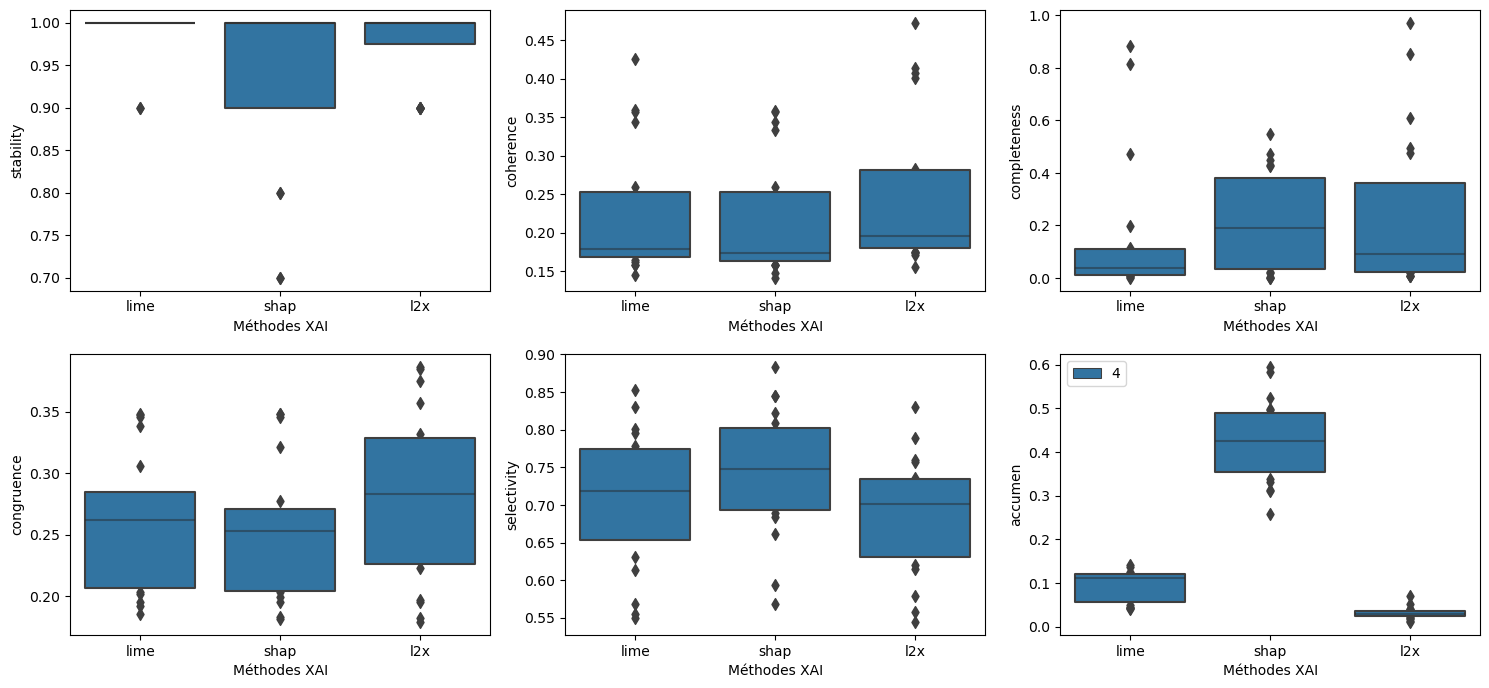

In [12]:
import matplotlib.pyplot as plt
import seaborn as sns

list_metrics = ["stability", "coherence","completeness", "congruence", "selectivity", "accumen"]
i = 1
plt.figure(figsize=(15,10))
for yy in list_metrics : 
    plt.subplot(3,3, i)
    sns.boxenplot(x="explainer_rec", y = yy, hue = "nb_couches", data = result_nblayer)
#     sns.lineplot(x = "models", y = "RMSE_scale", data = df_perf)
    plt.xlabel("Méthodes XAI")
    i+=1
for ax in plt.gcf().get_axes():
    ax.legend().set_visible(False)
#plt.tight_layout(rect=[0, 0, 1, 0.96])
plt.legend(loc='upper left')
plt.tight_layout()
plt.savefig("sfds_result/metrics_method")
plt.show()

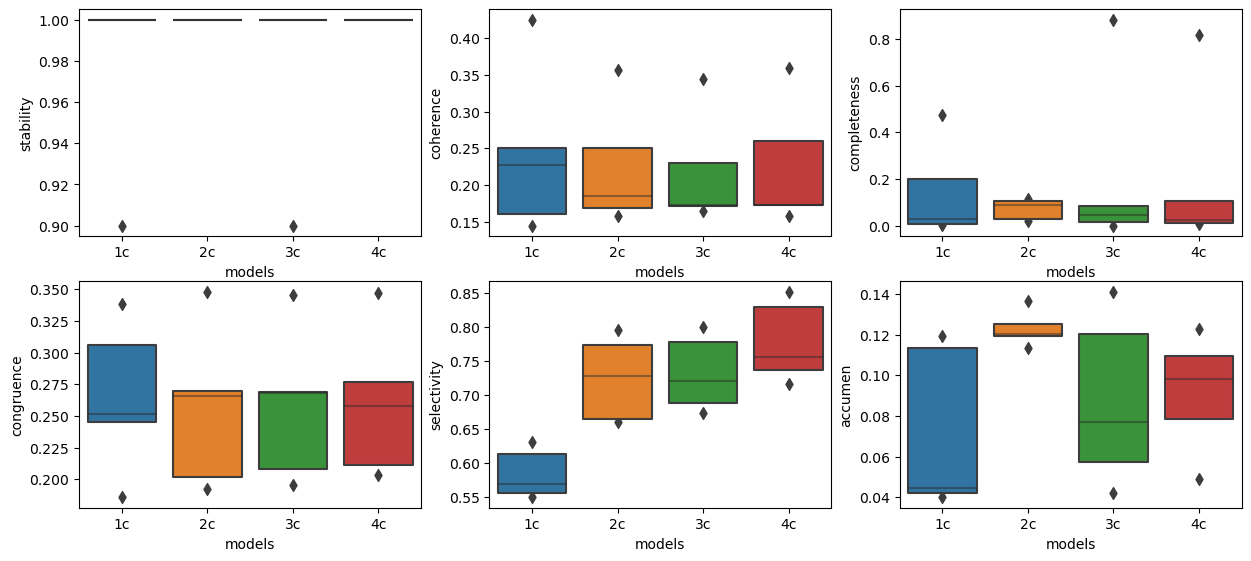

In [13]:
df_lime = result_nblayer.query("explainer_rec == 'lime'")

i = 1
plt.figure(figsize=(15,10))
for yy in list_metrics : 
    plt.subplot(3,3, i)
    sns.boxenplot(x="models", y = yy, data = df_lime)
#     sns.lineplot(x = "models", y = "RMSE_scale", data = df_perf)
    i+=1
plt.show()

In [14]:
df_lime.head(5)

,idx,identity,separability,stability,coherence,completness,congruence,selectivity,accumen,explainer,models,explainer_rec,completeness,nb_couches,nom_ligne
0,0,1.0,1.0,1.0,0.250002,123.782043,0.306072,0.614124,0.042397,lime_1c,1c,lime,0.008079,4,0_1c
3,0,1.0,1.0,1.0,0.161335,573.330444,0.185664,0.555408,0.119141,lime_1c,1c,lime,0.001744,4,3_1c
6,0,1.0,1.0,1.0,0.144818,32.490021,0.245558,0.630698,0.044520,lime_1c,1c,lime,0.030779,4,6_1c
9,0,1.0,1.0,1.0,0.227306,0.198970,0.251178,0.568998,0.113453,lime_1c,1c,lime,0.198970,4,9_1c
12,0,1.0,1.0,0.9,0.425000,2.116523,0.338580,0.549563,0.039991,lime_1c,1c,lime,0.472473,4,12_1c


In [1]:
# lime_tab = df_lime.pivot_table(index='models', columns='Product_name_3', values= 'Viscosity', aggfunc='mean')
# sns.heatmap(mat1)
df_lime = result_nblayer.query("explainer_rec == 'lime'")
df_limefinale = df_lime.drop(columns=["explainer", "explainer_rec", "idx", "completness", "nb_couches"],
                             axis=1)
mean_lime = df_limefinale.groupby(["models"]).mean()
std_lime = df_limefinale.groupby(["models"]).std()

In [ ]:
mean_lime

In [ ]:
std_lime

In [ ]:
df_shap = result_nblayer.query("explainer_rec == 'shap'")
df_shapfinale = df_shap.drop(columns=["explainer", 
                                      "explainer_rec", "idx", "completness", "nb_couches"],
                             axis=1)
mean_shap = df_shapfinale.groupby(["models"]).mean()
std_shap = df_shapfinale.groupby(["models"]).std()

In [ ]:
std_shap

In [ ]:
df_l2x = result_nblayer.query("explainer_rec == 'l2x'")
df_l2xfinale = df_l2x.drop(columns=["explainer", 
                                    "explainer_rec", "idx", "completness", "nb_couches"], 
                           axis=1)
mean_l2x = df_l2xfinale.groupby(["models"]).mean()
std_l2x = df_l2xfinale.groupby(["models"]).std()

In [ ]:
mean_l2x

In [ ]:
col = ["identity", "separability", 'stability', 'coherence', 'congruence', 'selectivity', 'accumen',
       'completeness']
col_mean = [c + "_mean" for c in col]
col_std = [c + "_std" for c in col]

In [ ]:
mean_lime.columns =  col_mean
std_lime.columns =  col_std
lime_mean_std = pd.concat([mean_lime, std_lime], axis = 1)
lime_mean_std["methode"] = "lime"
lime_mean_std

In [ ]:
mean_shap.columns =  col_mean
std_shap.columns =  col_std
shap_mean_std = pd.concat([mean_shap, std_shap], axis = 1)
shap_mean_std["methode"] = "shap"
shap_mean_std

In [ ]:
mean_l2x.columns =  col_mean
std_l2x.columns =  col_std
l2x_mean_std = pd.concat([mean_l2x, std_l2x], axis = 1)
l2x_mean_std["methode"] = "l2x"
l2x_mean_std

In [ ]:
df_synth = pd.concat([lime_mean_std, shap_mean_std], axis = 0)
df_synth = pd.concat([df_synth, l2x_mean_std], axis = 0)
df_synth

In [ ]:
cols = ['stability_mean', 'coherence_mean', 'congruence_mean',
       'selectivity_mean', 'accumen_mean', 'completeness_mean',
       'stability_std', 'coherence_std', 'congruence_std', 'selectivity_std',
       'accumen_std', 'completeness_std']
for c in cols : 
    df_synth[c] = df_synth[c].round(2)
df_synth

In [ ]:
col = ["identity", "separability", 'stability', 'coherence', 'congruence', 'selectivity', 'accumen',
       'completeness']
for i in range(8) : 
    df_synth[col[i]] = df_synth[col_mean[i]].astype(str) + "(" + df_synth[col_std[i]].astype(str) + ")"
df_synth

In [ ]:
synht = df_synth[['identity', 'separability', 'stability', 'coherence', 'congruence', 'selectivity', 'accumen',
       'completeness', "methode"]]
synht

In [ ]:
synht.to_csv("sfds_result/resultats_global.csv")

In [ ]:
nb_layers = []
for kk in range(1,5):
    for i in range(15):
        nb_layers.append(kk)
len(nb_layers)    
result_nblayer["nb_couches"] = nb_layers

In [ ]:
df_metrique = pd.read_csv('sfds_result/df_metric_sfds.csv')

In [ ]:
df_metrique.columns = ['idx', 'identity', 'separability', 'stability', 'coherence',
       'completness', 'congruence', 'selectivity', 'accumen', 'explainer']
df_metrique

In [ ]:
models = []
for f in name_model:
    for i in range(3):
        models.append(f)
len(models)

In [ ]:
df_metrique["models"] = models
df_metrique

In [ ]:
df_metrique["completeness"] = np.where(df_metrique["completness"] >= 1, 1/df_metrique["completness"], df_metrique["completness"])
df_metrique

In [ ]:
i = 1
plt.figure(figsize=(15,10))
for yy in list_metrics : 
    plt.subplot(3,3, i)
    sns.lineplot(x="models", y = yy, data = df_metrique)
#     sns.lineplot(x = "models", y = "RMSE_scale", data = df_perf)
    i+=1
plt.savefig("sfds_result/lime_variation.png")
plt.show()

In [ ]:
# pip install researchpy

### ANOVA

In [ ]:
import pandas as pd
import researchpy as rp

In [ ]:
df = pd.read_csv("https://raw.githubusercontent.com/researchpy/Data-sets/master/difficile.csv")
df.drop('person', axis= 1, inplace= True)

# Recoding value from numeric to string
df['dose'].replace({1: 'placebo', 2: 'low', 3: 'high'}, inplace= True)

df.info()

In [ ]:
rp.summary_cont(df['libido'])

In [ ]:
rp.summary_cont(df['libido'].groupby(df['dose']))

In [ ]:
import scipy.stats as stats

stats.f_oneway(df['libido'][df['dose'] == 'high'],
               df['libido'][df['dose'] == 'low'],
               df['libido'][df['dose'] == 'placebo'])